In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
import cv2
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

In [2]:
for dirname, _, filenames in os.walk('flowers'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

flowers/daisy/14167534527_781ceb1b7a_n.jpg
flowers/daisy/34718882165_68cdc9def9_n.jpg
flowers/daisy/5512287917_9f5d3f0f98_n.jpg
flowers/daisy/476857510_d2b30175de_n.jpg
flowers/daisy/521762040_f26f2e08dd.jpg
flowers/daisy/33837577463_1ae52a3726_n.jpg
flowers/daisy/34638378196_216d5bbc2e_n.jpg
flowers/daisy/7320089276_87b544e341.jpg
flowers/daisy/8008258043_5457dd254b_n.jpg
flowers/daisy/721595842_bacd80a6ac.jpg
flowers/daisy/8719756744_34a5a83976_n.jpg
flowers/daisy/5110107234_12ddc0206b_m.jpg
flowers/daisy/20773528301_008fcbc5a1_n.jpg
flowers/daisy/144076848_57e1d662e3_m.jpg
flowers/daisy/510844526_858b8fe4db.jpg
flowers/daisy/5632774792_0fa33d17eb_n.jpg
flowers/daisy/12891819633_e4c82b51e8.jpg
flowers/daisy/7630517248_98fb8bee1f_n.jpg
flowers/daisy/3706420943_66f3214862_n.jpg
flowers/daisy/20289938802_e16fa9f23d.jpg
flowers/daisy/11023214096_b5b39fab08.jpg
flowers/daisy/3474942718_c418dae6f1.jpg
flowers/daisy/3084924076_4d5c5711af_m.jpg
flowers/daisy/34542837641_10492bf600_n.jpg
flow

In [3]:
X = []
Y = []

flower_daisy = os.listdir('flowers/daisy')
flower_dandelion = os.listdir('flowers/dandelion')
flower_rose = os.listdir('flowers/rose')
flower_sunflower = os.listdir('flowers/sunflower')
flower_tulip = os.listdir('flowers/tulip')

In [4]:
print('Number of daisy images: ', len(flower_daisy))
print('Number of dandelion images: ', len(flower_dandelion))
print('Number of rose images: ', len(flower_rose))
print('Number of sunflower images: ', len(flower_sunflower))
print('Number of tulip images: ', len(flower_tulip))

Number of daisy images:  764
Number of dandelion images:  1052
Number of rose images:  784
Number of sunflower images:  733
Number of tulip images:  984


In [5]:
def assign_label(img, flower_type):
    return flower_type

In [6]:
def make_train_data(flower_type, DIR):
    for img in tqdm(os.listdir(DIR)):
        label = assign_label(img, flower_type)
        path = os.path.join(DIR, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (150, 150))
        
        X.append(np.array(img))
        Y.append(str(label))

In [7]:
make_train_data('Daisy', 'flowers/daisy')
print(len(X))

100%|██████████| 764/764 [00:01<00:00, 658.92it/s]

764


In [8]:
make_train_data('Dandelion', 'flowers/dandelion')
print(len(X))

100%|██████████| 1052/1052 [00:01<00:00, 691.14it/s]

1816


In [9]:
make_train_data('Rose', 'flowers/rose')
print(len(X))

100%|██████████| 784/784 [00:01<00:00, 699.46it/s]

2600


In [10]:
make_train_data('Sunflower', 'flowers/sunflower')
print(len(X))

100%|██████████| 733/733 [00:01<00:00, 558.72it/s]

3333


In [11]:
make_train_data('Tulip', 'flowers/tulip')
print(len(X))

100%|██████████| 984/984 [00:01<00:00, 643.64it/s]

4317


In [12]:
labelEncoder = LabelEncoder()
Y = labelEncoder.fit_transform(Y)
Y = to_categorical(Y,5)
X = np.array(X)
X = X/ 255

In [13]:
# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (3453, 150, 150, 3)
x_test shape:  (864, 150, 150, 3)
y_train shape:  (3453, 5)
y_test shape:  (864, 5)


In [14]:
# The MLP should have at least 2
# hidden layers, and you can choose the number of neurons in each layer. You should use cross-
# entropy loss function, stochastic gradient descent optimization algorithm with a learning rate of
# 0.01.

from keras.models import Sequential

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
 
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                    activation ='relu', input_shape = (150,150,3)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                    activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                    activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                    activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(5, activation = "softmax"))
 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
 
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64

2023-04-24 19:17:55.539465: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


108/108 [==============================] - 51s 453ms/step - loss: 1.6897 - accuracy: 0.2288 - val_loss: 1.6018 - val_accuracy: 0.2581
Epoch 2/10
108/108 [==============================] - 44s 404ms/step - loss: 1.6017 - accuracy: 0.2340 - val_loss: 1.5971 - val_accuracy: 0.2581
Epoch 3/10
108/108 [==============================] - 43s 398ms/step - loss: 1.5942 - accuracy: 0.2635 - val_loss: 1.5289 - val_accuracy: 0.3391
Epoch 4/10
108/108 [==============================] - 43s 397ms/step - loss: 1.4838 - accuracy: 0.3663 - val_loss: 1.4279 - val_accuracy: 0.3808
Epoch 5/10
108/108 [==============================] - 43s 400ms/step - loss: 1.2901 - accuracy: 0.4671 - val_loss: 1.2226 - val_accuracy: 0.4884
Epoch 6/10
108/108 [==============================] - 43s 400ms/step - loss: 1.1184 - accuracy: 0.5589 - val_loss: 1.1832 - val_accuracy: 0.5289
Epoch 7/10
108/108 [==============================] - 43s 397ms/step - loss: 0.9286 - accuracy: 0.6429 - val_loss: 1.1743 - val_accuracy: 0.5

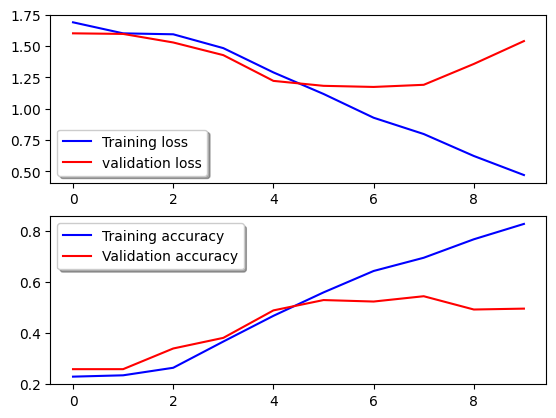

In [15]:
# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [16]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
7/7 [==============================] - 4s 478ms/step - loss: 1.5401 - accuracy: 0.4954
test loss, test acc: [1.5400636196136475, 0.49537035822868347]


In [17]:
# print classification report
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred,axis = 1)
y_true = np.argmax(y_test,axis = 1)
print(classification_report(y_true, y_pred_classes))
 

27/27 [==============================] - 3s 106ms/step
              precision    recall  f1-score   support

           0       0.57      0.36      0.44       162
           1       0.57      0.62      0.59       223
           2       0.43      0.59      0.50       155
           3       0.47      0.36      0.40       135
           4       0.46      0.48      0.47       189

    accuracy                           0.50       864
   macro avg       0.50      0.48      0.48       864
weighted avg       0.50      0.50      0.49       864



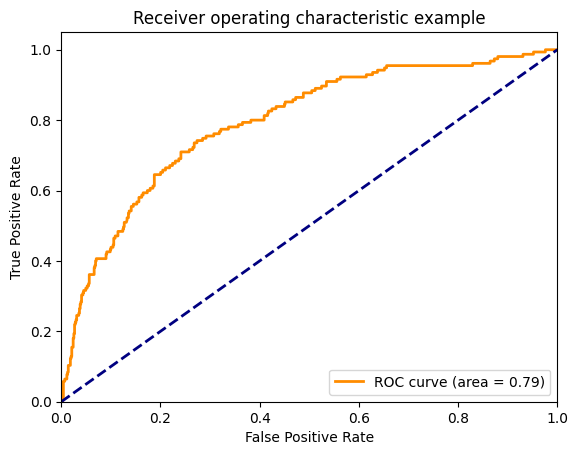

In [18]:
# plot roc curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
     
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
 
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

 

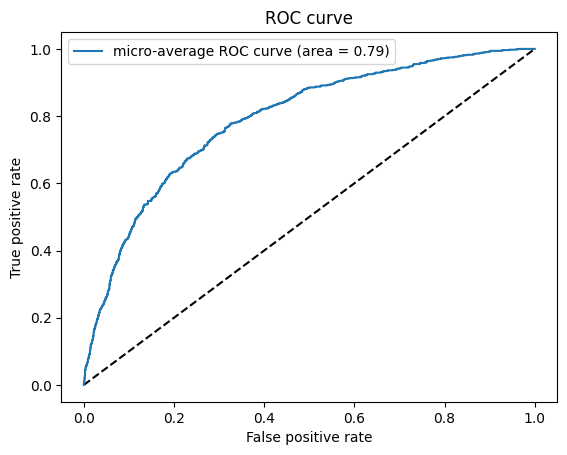

In [19]:
# plot auc curve
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:0.2f})'
                                        ''.format(roc_auc["micro"]))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
